In [21]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from skimage.feature import hog

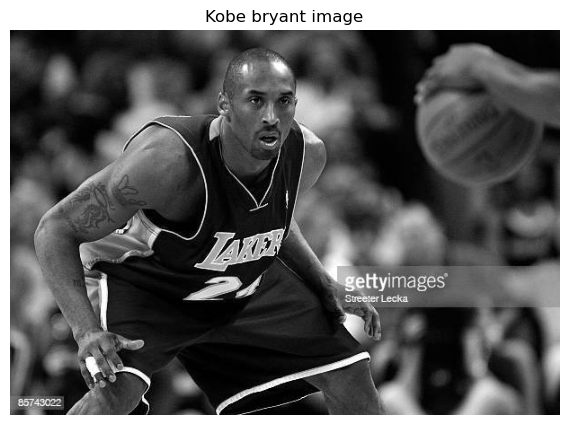

In [13]:
image = cv2.imread("Sports-celebrity-images/Kobe-Bryant/kobe_(40).jpg")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (12,5))
plt.imshow(image_gray,cmap="gray")
plt.title("Kobe bryant image")
plt.axis("off")
plt.show()

In [17]:
f_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = f_cascade.detectMultiScale(image,1.1,5)

for (x,y,w,h) in faces:
    img= cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)

cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [87]:
data_folder = "Sports-celebrity-images"

images = []
labels = []
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
labels_names = os.listdir(data_folder)

for label in labels_names: 
    folder = os.path.join(data_folder, label)
    for img_file in os.listdir(folder): 
        image_path = os.path.join(folder, img_file)
        img_color = cv2.imread(image_path)
        img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # fix: use cvtColor, not cv2.imread with 2 params

        faces = face_cascade.detectMultiScale(img_gray, 1.1, 5)
        if len(faces) == 0:
            continue  # Skip image if no face is detected

        x, y, w, h = faces[0]
        face_region_gray = img_gray[y:y+h, x:x+w]
        face_region_color = img_color[y:y+h, x:x+w]

        face_resized_gray = cv2.resize(face_region_gray, (128, 128))
        face_resized_color = cv2.resize(face_region_color, (64, 64))

        features, _ = hog(face_resized_gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)

        hist_b = cv2.calcHist([face_resized_color], [0], None, [32], [0, 256]).flatten()
        hist_g = cv2.calcHist([face_resized_color], [1], None, [32], [0, 256]).flatten()
        hist_r = cv2.calcHist([face_resized_color], [2], None, [32], [0, 256]).flatten()

        # fix typo: "faetures" → "features", "featues" → "features"
        full_features = np.concatenate([features, hist_b, hist_g, hist_r])
        images.append(full_features)
        labels.append(label)


x = np.array(images)
y = np.array(labels)
    


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.50047053,  2.71636467,  0.63911077, ...,  1.10239618,
         0.73095691, -0.03107459],
       [ 0.75711263,  1.85234829,  1.67173329, ...,  0.39542077,
         0.95680067,  0.64632708],
       [-0.25902821,  0.41616968,  0.71527256, ...,  0.13030499,
         0.38251225,  1.84922821],
       ...,
       [ 1.26850371,  2.16037352, -0.6374049 , ..., -0.52512014,
        -0.46278867, -0.38003908],
       [-0.77837549,  0.16486787, -0.71624984, ...,  0.08611902,
        -0.18532348, -0.35951176],
       [ 1.26187027,  2.4390359 , -0.00603838, ...,  0.25549855,
         0.18893189,  0.14956586]])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [105]:
model_svm = SVC(kernel="linear",C = 10)
model_svm.fit(x_train,y_train)
model_svm.score(x_test,y_test)


0.6885245901639344

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_encoded,test_size = 0.20)

In [93]:
model_forest = RandomForestClassifier(n_estimators = 100)
model_forest.fit(x_train,y_train)
model_forest.score(x_test,y_test)

0.6229508196721312

In [95]:
model_xgboost = XGBClassifier()
model_xgboost.fit(x_train,y_train)
model_xgboost.score(x_test,y_test)

0.639344262295082

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [127]:
model_svm = SVC(kernel="linear",C = 0.1)
model_svm.fit(x_train_pca,y_train)
model_svm.score(x_test_pca,y_test)


0.6885245901639344

In [123]:
model_forest = RandomForestClassifier(n_estimators = 100)
model_forest.fit(x_train_pca,y_train)
model_forest.score(x_test_pca,y_test)

0.5081967213114754

In [125]:
model_xgboost = XGBClassifier()
model_xgboost.fit(x_train_pca,y_train)
model_xgboost.score(x_test_pca,y_test)

0.5081967213114754